In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data1= pd.read_excel('Airlines+Data.xlsx',parse_dates=True,index_col=0)

In [13]:
data1.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [14]:
data=data1.copy()

In [15]:
#upsampling to daily intervals

In [16]:
upsampled= data.resample('D').mean()
print(upsampled.head(32))

            Passengers
Month                 
1995-01-01       112.0
1995-01-02         NaN
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-07         NaN
1995-01-08         NaN
1995-01-09         NaN
1995-01-10         NaN
1995-01-11         NaN
1995-01-12         NaN
1995-01-13         NaN
1995-01-14         NaN
1995-01-15         NaN
1995-01-16         NaN
1995-01-17         NaN
1995-01-18         NaN
1995-01-19         NaN
1995-01-20         NaN
1995-01-21         NaN
1995-01-22         NaN
1995-01-23         NaN
1995-01-24         NaN
1995-01-25         NaN
1995-01-26         NaN
1995-01-27         NaN
1995-01-28         NaN
1995-01-29         NaN
1995-01-30         NaN
1995-01-31         NaN
1995-02-01       118.0


In [20]:
# missing values interpolation

            Passengers
Month                 
1995-01-01  112.000000
1995-01-02  112.193548
1995-01-03  112.387097
1995-01-04  112.580645
1995-01-05  112.774194
1995-01-06  112.967742
1995-01-07  113.161290
1995-01-08  113.354839
1995-01-09  113.548387
1995-01-10  113.741935


Text(0.5, 1.0, 'Monthly Distribution of Passengers data')

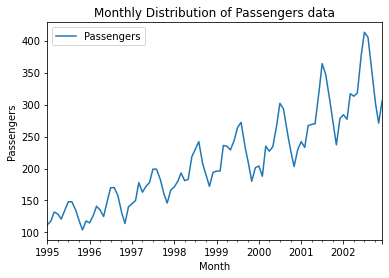

In [21]:
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(10))
interpolated.plot()
plt.ylabel("Passengers")
plt.title("Monthly Distribution of Passengers data")

In [22]:
# applying square root transformation

In [23]:
from numpy import sqrt

In [24]:
airline=pd.DataFrame(data.values)
airline.columns=['passengers']
airline['passengers']=sqrt(airline['passengers'])

In [25]:
#line plot

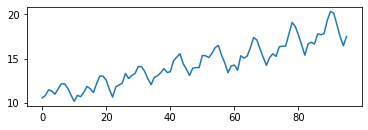

In [26]:
plt.subplot(211)
plt.plot(airline['passengers'])

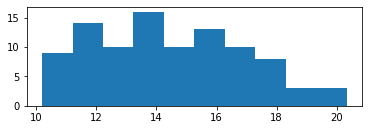

In [27]:
plt.subplot(212)
plt.hist(airline['passengers'])
plt.show()

In [28]:
# Log transformation

In [29]:
from numpy import log

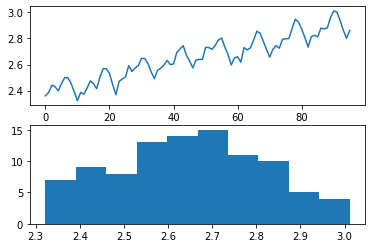

In [30]:
airline['passengers']=log(airline['passengers'])
#line plot
plt.subplot(211)
plt.plot(airline['passengers'])
#histogram
plt.subplot(212)
plt.hist(airline['passengers'])
plt.show()

In [31]:
# simple moving average

In [32]:
airline['6-month-SMA']=airline['passengers'].rolling(window=6).mean()
airline['12-month-SMA']=airline['passengers'].rolling(window=12).mean()

In [33]:
airline.head(16)

,passengers,6-month-SMA,12-month-SMA
0,2.359249,NaN,NaN
1,2.385342,NaN,NaN
2,2.441401,NaN,NaN
3,2.429906,NaN,NaN
4,2.397895,NaN,NaN
5,2.452637,2.411072,NaN
6,2.498606,2.434298,NaN
7,2.498606,2.453175,NaN
8,2.456327,2.455663,NaN
9,2.389562,2.448939,NaN


<AxesSubplot:>

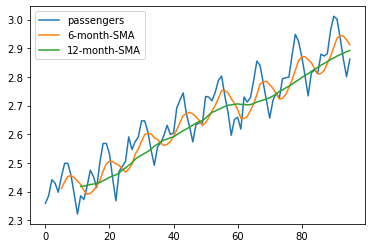

In [34]:
airline.plot()

In [35]:
# Exponential WEighted moving average

In [36]:
# Simple Exponential smoothing

<AxesSubplot:>

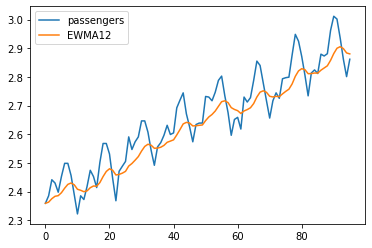

In [37]:
airline['EWMA12']=airline['passengers'].ewm(span=12,adjust=False).mean()
airline[['passengers','EWMA12']].plot()

In [38]:
# comparing SMA to EWMA

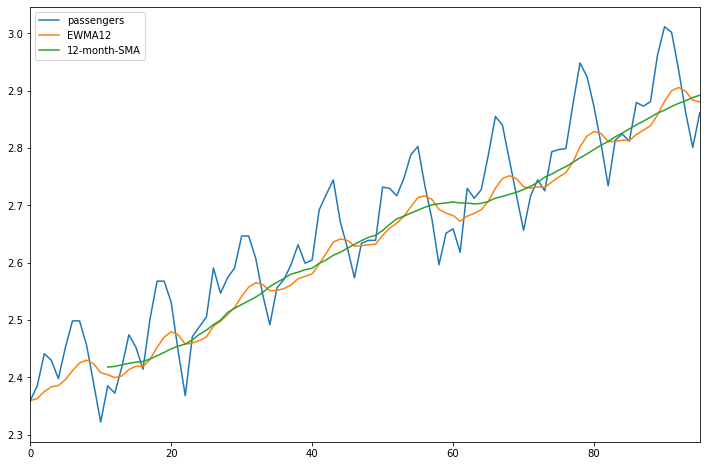

In [39]:
airline[['passengers','EWMA12','12-month-SMA']].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

In [40]:
# Test Train Split

In [41]:
train_data=data.iloc[0:83]
test_data=data.iloc[83:]
train_data.shape
test_data.shape

(13, 1)

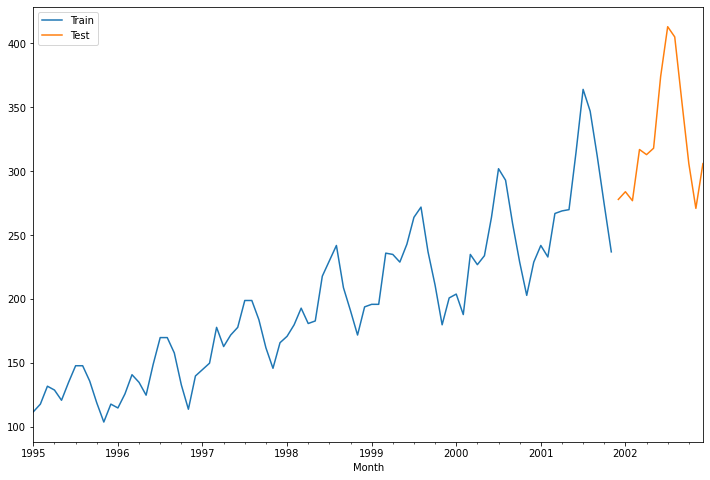

In [42]:
train_data['Passengers'].plot(legend=True,label='Train')
test_data['Passengers'].plot(legend=True,label='Test',figsize=(12,8));

In [43]:
# model building

In [44]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model= ExponentialSmoothing(train_data['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12)
fitted_model=model.fit()

K:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
K:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
K:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [46]:
# predicting model

In [47]:
test_prediction=fitted_model.forecast(13)

In [48]:
test_prediction

2001-12-01    271.125139
2002-01-01    278.220218
2002-02-01    276.789315
2002-03-01    322.241703
2002-04-01    313.627628
2002-05-01    313.612127
2002-06-01    353.216867
2002-07-01    395.947126
2002-08-01    392.582847
2002-09-01    350.209952
2002-10-01    309.394614
2002-11-01    270.901019
2002-12-01    308.380566
Freq: MS, dtype: float64

<AxesSubplot:xlabel='Month'>

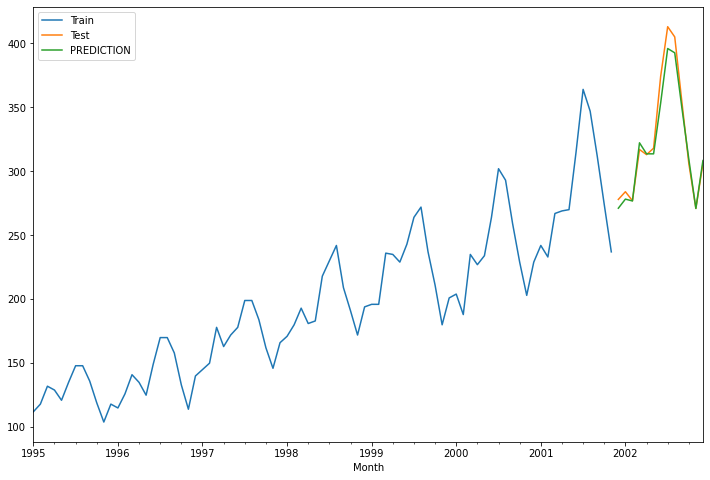

In [49]:
train_data['Passengers'].plot(legend=True,label='Train')
test_data['Passengers'].plot(legend=True,label='Test',figsize=(12,8))
test_prediction.plot(legend=True,label='PREDICTION')

<AxesSubplot:xlabel='Month'>

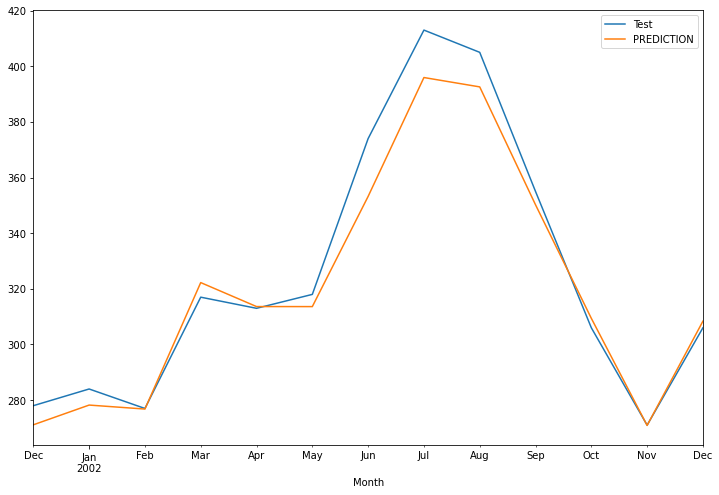

In [50]:
test_data['Passengers'].plot(legend=True,label='Test',figsize=(12,8))
test_prediction.plot(legend=True,label='PREDICTION')

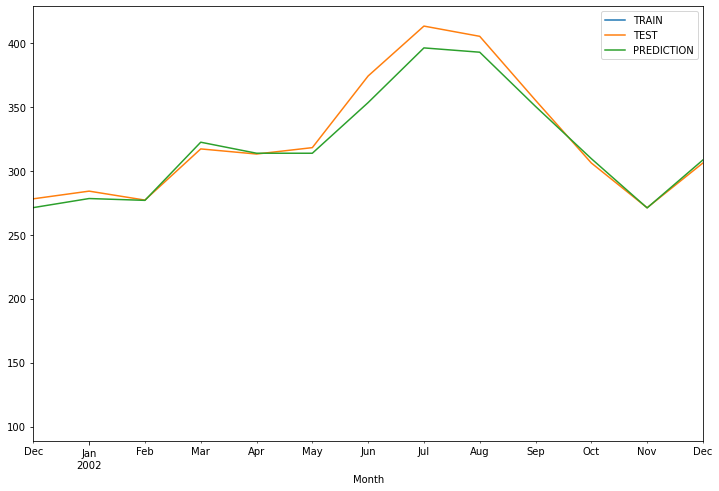

In [51]:
train_data['Passengers'].plot(legend=True,label='TRAIN')
test_data['Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_prediction.plot(legend=True,label='PREDICTION',xlim=['2001-12-01','2002-12-01']);

In [52]:
# Evaluation Metrics

In [53]:
from sklearn.metrics import mean_squared_error

In [54]:
mean_squared_error(test_data,test_prediction)

80.37742035556133

In [55]:
np.sqrt(mean_squared_error(test_data,test_prediction))

8.965345523489953

In [56]:
test_data.describe()

,Passengers
count,13.000000
mean,324.384615
std,47.896657
min,271.000000
25%,284.000000
50%,313.000000
75%,355.000000
max,413.000000


Forecasting into Future

In [57]:
final_model=ExponentialSmoothing(data['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
forecast_prediction= final_model.forecast(36)

K:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
K:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
K:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<AxesSubplot:xlabel='Month'>

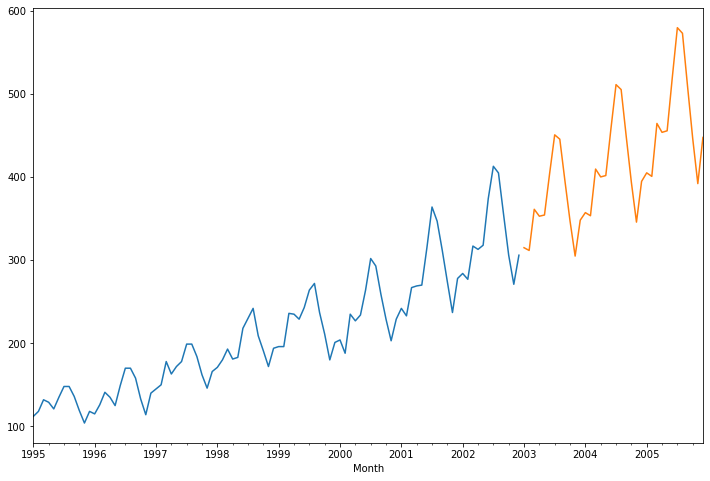

In [58]:
data['Passengers'].plot(figsize=(12,8))
forecast_prediction.plot()

Simple Exponential Smoothing

In [59]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [60]:
span=12
alpha=2/(span+1)

In [61]:
data['EWMA12']=data['Passengers'].ewm(alpha=alpha,adjust=False).mean()

In [62]:
model_ses12=SimpleExpSmoothing(data['Passengers'])
fittted_model=model_ses12.fit(smoothing_level=alpha,optimized=False)
data['SES12']= fitted_model.fittedvalues.shift(-1)
data

K:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
K:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


,Passengers,EWMA12,SES12
Month,,,
1995-01-01,112,112.000000,111.930435
1995-02-01,118,112.923077,134.951608
1995-03-01,132,115.857988,129.457479
1995-04-01,129,117.879836,129.150648
1995-05-01,121,118.359861,139.431626
...,...,...,...
2002-08-01,405,335.501047,NaN
2002-09-01,355,338.500886,NaN
2002-10-01,306,333.500749,NaN


Double Exponential Smoothing

In [63]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [64]:
mod_add12 = ExponentialSmoothing(data['Passengers'], trend='add')
fitted_model= mod_add12.fit()
data['DESadd12'] = fitted_model.fittedvalues.shift(-1)
data

K:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
K:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


,Passengers,EWMA12,SES12,DESadd12
Month,,,,
1995-01-01,112,112.000000,111.930435,114.193150
1995-02-01,118,112.923077,134.951608,120.188878
1995-03-01,132,115.857988,129.457479,134.181035
1995-04-01,129,117.879836,129.150648,131.205163
1995-05-01,121,118.359861,139.431626,123.209037
...,...,...,...,...
2002-08-01,405,335.501047,NaN,407.244124
2002-09-01,355,338.500886,NaN,357.289040
2002-10-01,306,333.500749,NaN,308.268292


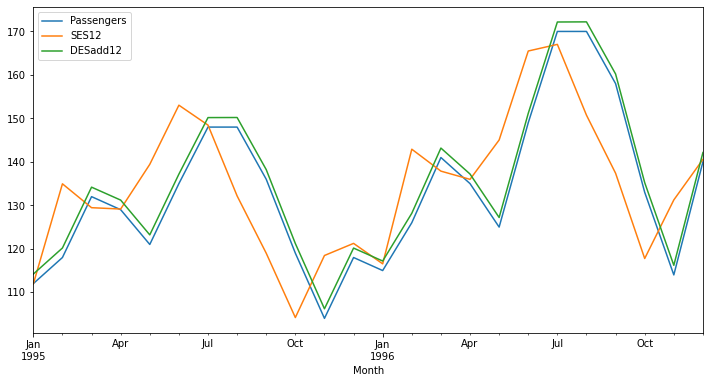

In [65]:
data[['Passengers','SES12','DESadd12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [66]:
data['DESmul12'] = ExponentialSmoothing(data['Passengers'], trend='mul').fit().fittedvalues.shift(-1)
data.head()

K:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
K:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


,Passengers,EWMA12,SES12,DESadd12,DESmul12
Month,,,,,
1995-01-01,112,112.000000,111.930435,114.193150,110.474522
1995-02-01,118,112.923077,134.951608,120.188878,116.602877
1995-03-01,132,115.857988,129.457479,134.181035,130.926771
1995-04-01,129,117.879836,129.150648,131.205163,127.955666
1995-05-01,121,118.359861,139.431626,123.209037,119.843887


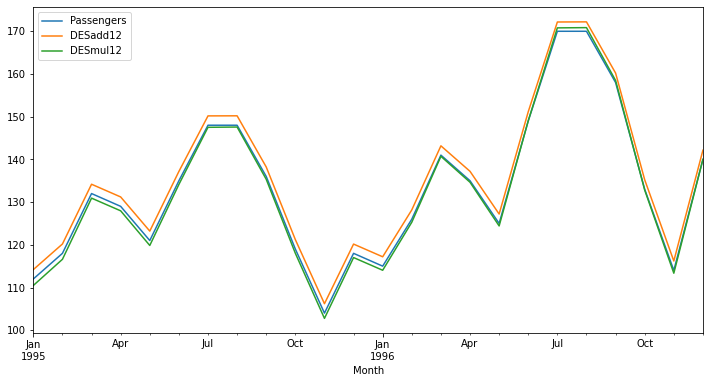

In [67]:
data[['Passengers','DESadd12','DESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Triple Exponential Smoothing

In [68]:
data['TESadd12'] = ExponentialSmoothing(data['Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
data.head()

K:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
K:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


,Passengers,EWMA12,SES12,DESadd12,DESmul12,TESadd12
Month,,,,,,
1995-01-01,112,112.000000,111.930435,114.193150,110.474522,112.003718
1995-02-01,118,112.923077,134.951608,120.188878,116.602877,119.935064
1995-03-01,132,115.857988,129.457479,134.181035,130.926771,134.250762
1995-04-01,129,117.879836,129.150648,131.205163,127.955666,130.738593
1995-05-01,121,118.359861,139.431626,123.209037,119.843887,123.864913


In [69]:
data['TESmul12'] = ExponentialSmoothing(data['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
data.head()

K:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
K:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
K:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


,Passengers,EWMA12,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Month,,,,,,,
1995-01-01,112,112.000000,111.930435,114.193150,110.474522,112.003718,113.646161
1995-02-01,118,112.923077,134.951608,120.188878,116.602877,119.935064,111.327001
1995-03-01,132,115.857988,129.457479,134.181035,130.926771,134.250762,134.356764
1995-04-01,129,117.879836,129.150648,131.205163,127.955666,130.738593,129.668286
1995-05-01,121,118.359861,139.431626,123.209037,119.843887,123.864913,129.739735


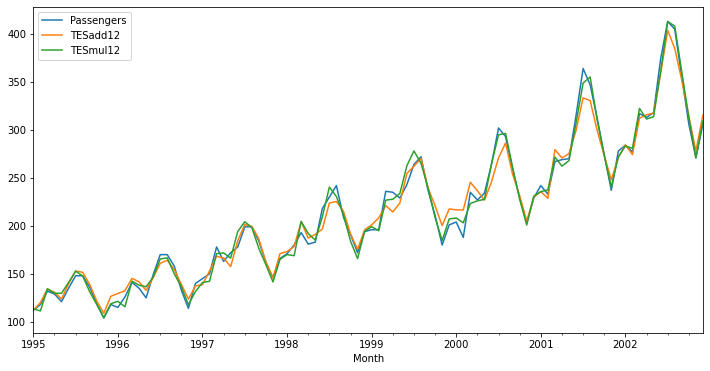

In [70]:
data[['Passengers','TESadd12','TESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

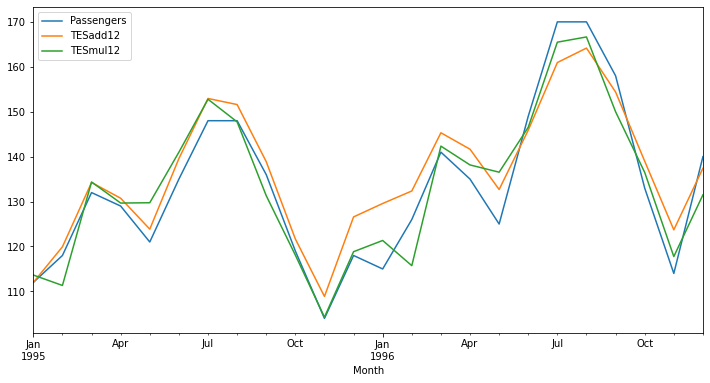

In [71]:
data[['Passengers','TESadd12','TESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [72]:
from statsmodels.tsa.ar_model import AR,ARResults

In [73]:
ar_models= AR(train_data['Passengers'])
ARfit=ar_models.fit(method='mle',ic='aic')

K:\anaconda\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)
K:\anaconda\lib\

In [74]:
ARfit.params

const            2.845672
L1.Passengers    1.179806
L2.Passengers   -0.434337
L3.Passengers    0.174031
L4.Passengers   -0.289232
L5.Passengers    0.304467
L6.Passengers   -0.078444
L7.Passengers    0.066191
L8.Passengers   -0.361895
L9.Passengers    0.425184
dtype: float64

In [75]:
start=len(train_data)
end=len(data)-1

In [76]:
#predict test data
prediction9=ARfit.predict(start=start,end=end).rename('AR(9) Prediction')

<AxesSubplot:xlabel='Month'>

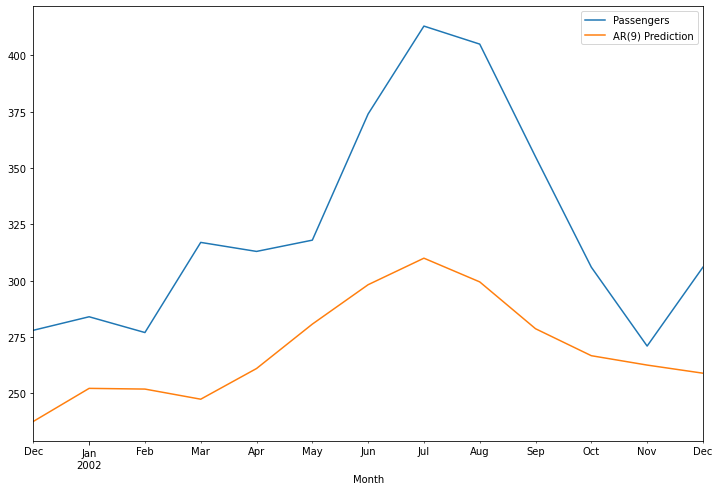

In [77]:
#plot the test data and prediction data
test_data['Passengers'].plot(legend=True)
prediction9.plot(legend=True,figsize=(12,8))

ARIMA

In [79]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data.Passengers, order=(1,1,1))
model_fit = model.fit(disp=0)

K:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
K:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.war

In [80]:
# summary of the model

In [81]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Passengers   No. Observations:                   95
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -427.813
Method:                       css-mle   S.D. of innovations             21.536
Date:                Tue, 30 Nov 2021   AIC                            863.627
Time:                        11:33:37   BIC                            873.842
Sample:                    02-01-1995   HQIC                           867.755
                         - 12-01-2002                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.2914      0.266      8.601      0.000       1.769       2.814
ar.L1.D.Passengers     0.7248      0.073      9.898      0.000       0.581       0.868
ma.L1.D.Passengers    -1.0000      0.028    -36.363      0.000      -1.054      -0.946
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3797           +0.0000j            1.3797            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [82]:
# Root mean squared error of ARIMA

In [83]:
import numpy as np
residual = pd.DataFrame(model_fit.resid)
rmse = np.mean(((residual)**2)**0.5)
rmse

0    16.950775
dtype: float64

In [84]:
# Residual plot & Density of Residuals :

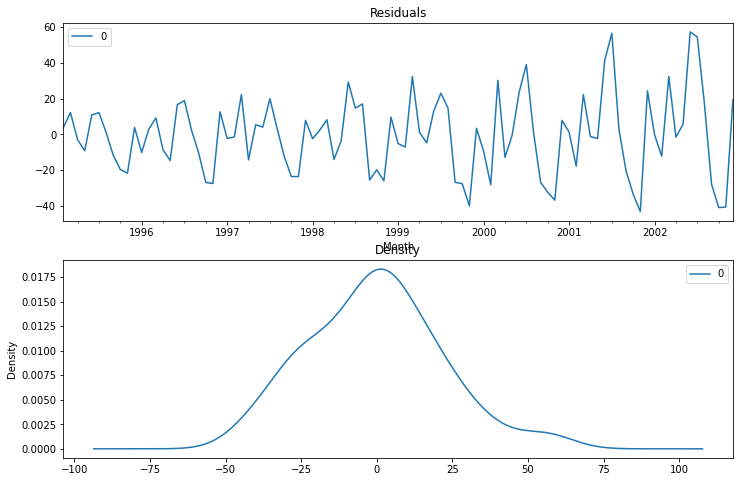

In [85]:
fig, ax = plt.subplots(2,1, figsize=(12,8))
residual.plot(title="Residuals", ax=ax[0])
residual.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [88]:
# prediction 

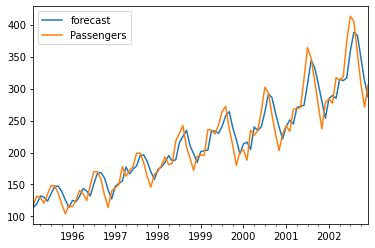

In [89]:
model_fit.plot_predict()
plt.show()

In [90]:
# split data :
train = data.Passengers[0:83]
test = data.Passengers[83:]

In [91]:
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)

K:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
K:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.war

In [92]:
# forecast sales value :

In [93]:
forecast, se, conf = fitted.forecast(13, alpha=0.05)

In [97]:
# Forecasting vs Actual Graph 

In [98]:
fc_series = pd.Series(forecast, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

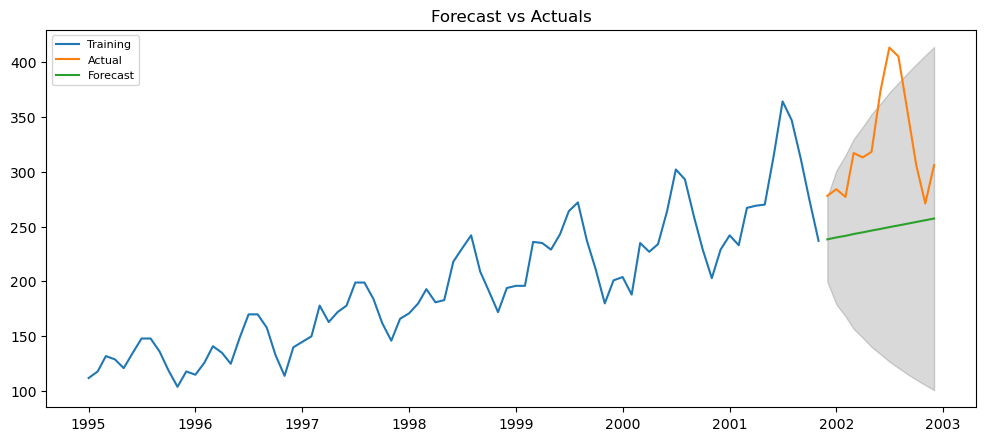

In [99]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='Training')
plt.plot(test, label='Actual')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)

In [100]:
# get rmse and acf value for testing :
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    rmse = np.mean((forecast - actual)**2)**.5  # Root mean squared error
    acf1 = acf(forecast-test)                     # Auto correlation function
    return({ 'rmse':rmse, 'acf1':acf1 
            })

forecast_accuracy(forecast, test.values)

K:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
K:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'rmse': 88.64121674314228,
 'acf1': array([ 1.        ,  0.69551137,  0.16926336, -0.2682298 , -0.43325362,
        -0.41369389, -0.33775021, -0.23381556, -0.08797993,  0.09368157,
         0.15541515,  0.12149124,  0.03936032])}

SARIMA Model

In [108]:
import statsmodels.api as sm

In [103]:
mod = sm.tsa.SARIMAX(data["Passengers"], trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()

K:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
K:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [104]:
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                           Passengers   No. Observations:                   96
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -307.047
Date:                              Tue, 30 Nov 2021   AIC                            620.094
Time:                                      11:36:15   BIC                            627.350
Sample:                                  01-01-1995   HQIC                           623.009
                                       - 12-01-2002                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.1455      0.446     -0.327      0.744      -1.019       0.728
ma.S.L12      -0.12

In [105]:
sarima_rmse = np.mean(((results.resid)**2)**0.5)
sarima_rmse

9.53612812868097

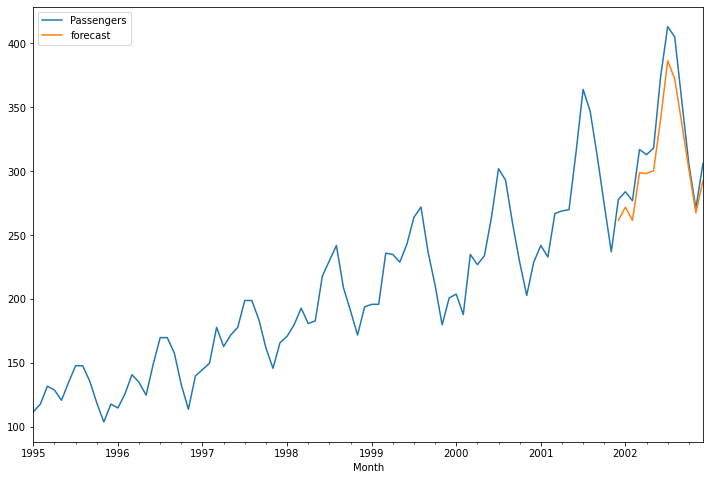

In [106]:
data['forecast'] = results.predict(start = 83, end=96 , dynamic= True)  
data[['Passengers', 'forecast']].plot(figsize=(12, 8))
plt.show()

In [109]:
# Therefor, after calculating rmse for different models we can conclude that SARIMA model performing on whole
# Passengers value gives us lesser rmse is good model compare to model with ARIMA model with -1 dispersion and applying on training data.

In [110]:
# rmse from ARIMA model with 0 dispersion on whole Passengers data gives higher rmse compare to SARIMA.

# Therefore, SARIMA model is good compare to others.